# Model Training: Test

In [3]:
# Import functionalities 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os, sys 

# System configuration
sys.path.append(os.path.abspath(".."))

## Data Loading

In [4]:
# Functionality for data loading
from scripts.collection.collector import DataLoader

In [5]:
# Load the dataset
dataloader = DataLoader("processed_lp_data.csv", folder="training")
dataset = dataloader.load()
dataset

File accepted


,PRICE,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),COLOR,BRAND_acer,BRAND_asus,...,GPU_intel,GPU_mali,GPU_nvidia,GPU_other,OPERATING_SYSTEM_android,OPERATING_SYSTEM_chrome,OPERATING_SYSTEM_linux,OPERATING_SYSTEM_mac,OPERATING_SYSTEM_unknown,OPERATING_SYSTEM_windows
0,303.80,0,0,512,1,0,1,6,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,175.00,0,1,500,500,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,85.00,1,1,16,240,1,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,101.25,0,1,256,256,1,1,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50.00,0,0,256,16,0,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,162.20,0,0,256,240,0,0,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4178,93.25,0,0,256,240,0,0,11,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4179,424.80,0,0,256,120,0,0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4180,90.94,1,1,256,240,0,1,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Workflow for Model Training

+ Correlation Analysis (for Linear Regression)
+ Data Splitting: split data into training, testing and validation
+ Model Building
+ Model Training

Models used for this project: 
- Linear Regression
- Regularised Linear Regression: Ridge Regression, Lasso Regression, ElasticNet Regression
- Decision Trees
- Random Forest Model
- Gradient Boosting Machine
- Linear Neural Network (LNN): with Linear Regression

For this notebook: start with Simple Linear Regression and Multivariate Linear Regression

## Correlation Analysis

In [6]:
# Import library for applying correlation analysis 
import seaborn as sns 

<Axes: >

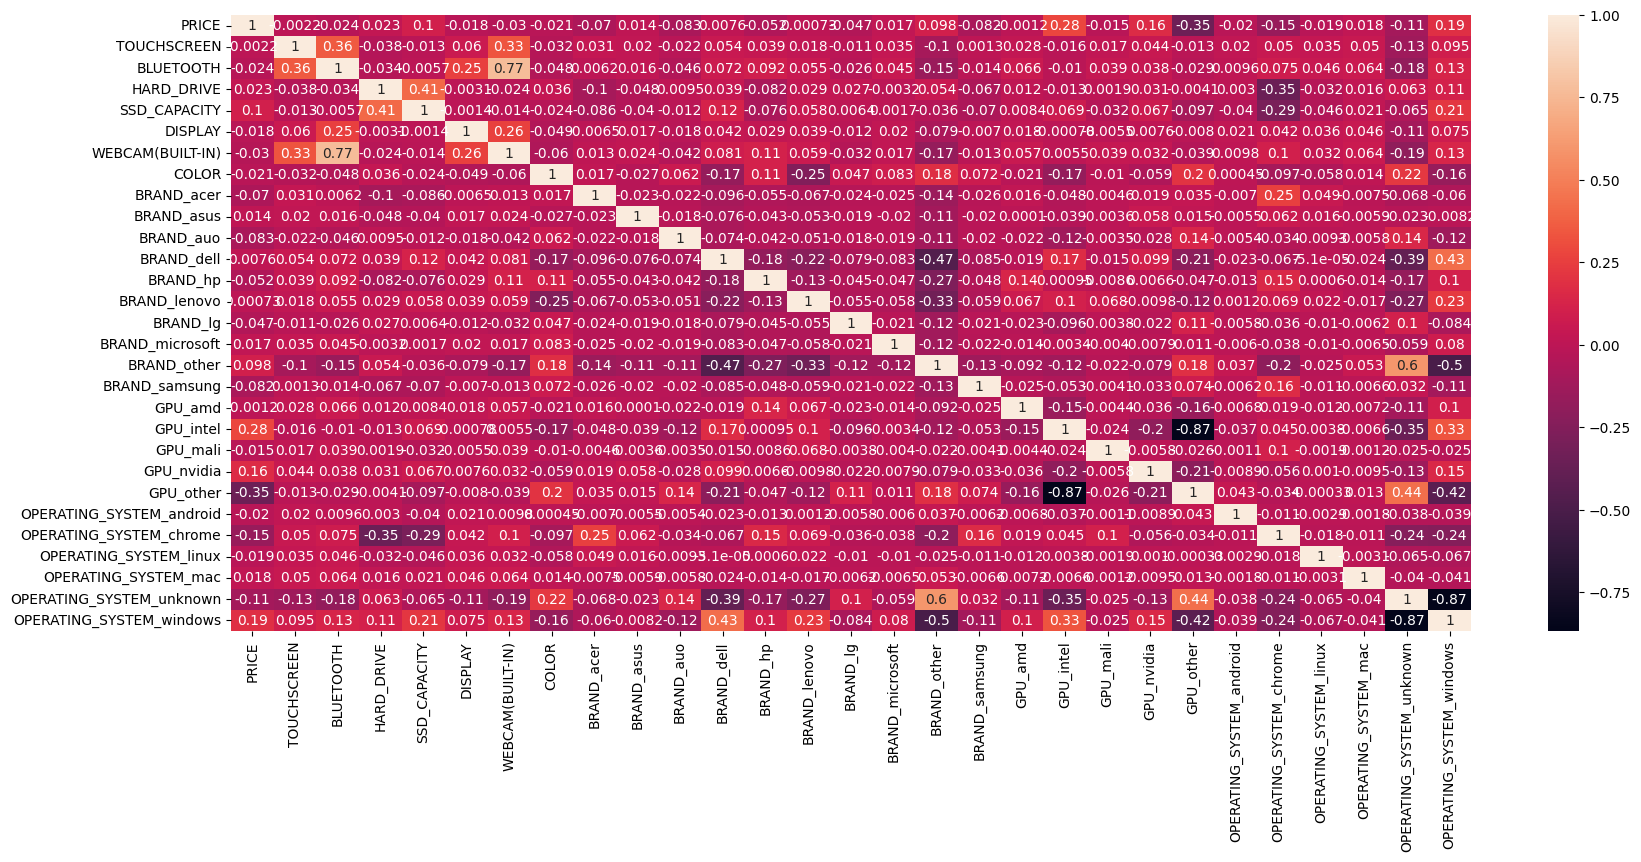

In [7]:
# Construct algorithm: apply correlation analysis 
correl_data = dataset.corr()
plt.figure(figsize=(20,8))
sns.heatmap(data=correl_data, annot=True)

In [8]:
dataset.columns

Index(['PRICE', 'TOUCHSCREEN', 'BLUETOOTH', 'HARD_DRIVE', 'SSD_CAPACITY',
       'DISPLAY', 'WEBCAM(BUILT-IN)', 'COLOR', 'BRAND_acer', 'BRAND_asus',
       'BRAND_auo', 'BRAND_dell', 'BRAND_hp', 'BRAND_lenovo', 'BRAND_lg',
       'BRAND_microsoft', 'BRAND_other', 'BRAND_samsung', 'GPU_amd',
       'GPU_intel', 'GPU_mali', 'GPU_nvidia', 'GPU_other',
       'OPERATING_SYSTEM_android', 'OPERATING_SYSTEM_chrome',
       'OPERATING_SYSTEM_linux', 'OPERATING_SYSTEM_mac',
       'OPERATING_SYSTEM_unknown', 'OPERATING_SYSTEM_windows'],
      dtype='object')

## Model Building: Linear Regression Models

In [9]:
# Implement functionalities for building models
from models.models import RegressModel
from models.pipeline import Pipeline, data_preparation

In [10]:
# Implement models: Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Building 4 models:
- Model 1: Simple Linear Regression
- Model 2: Ridge Regression
- Model 3: Lasso Regression
- Model 4: ElasticNet Regression

In [11]:
# Build 4 models 
mlsystem1 = Pipeline(RegressModel(LinearRegression()), dataset, test_size=0.25)
mlsystem2 = Pipeline(RegressModel(Ridge()), dataset, test_size=0.25)
mlsystem3 = Pipeline(RegressModel(Lasso()), dataset, test_size=0.25)
mlsystem4 = Pipeline(RegressModel(ElasticNet()), dataset, test_size=0.25)

In [12]:
# (xtrain, ytrain),(xtest, ytest) = data_preparation(dataset, "PRICE", 0.25)
# model1 = RegressModel(Linea)

In [13]:
# Machine Learning Pipeline 1
mlsystem1.run()

Mean Absolute Error: 200.94896778249256
Mean Squared Error: 116407.62489903987
R2 Score: 0.16213973546544636


Created by Adoan - 11-01-26